Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 605.3608 - mean_squared_error: 605.3608 - val_loss: 515.9637 - val_mean_squared_error: 515.9637
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 546.4675 - mean_squared_error: 546.4675 - val_loss: 458.5903 - val_mean_squared_error: 458.5903
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 476.3000 - mean_squared_error: 476.3000 - val_loss: 385.5505 - val_mean_squared_error: 385.5505
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 387.8797 - mean_squared_error: 387.8797 - val_loss: 292.0059 - val_mean_squared_error: 292.0059
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 277.9088 - mean_squared_error: 277.9088 - val_loss: 187.2178 - val_mean_squared_error: 187.2178
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 168.5928 - mean_squared_error: 168.5928 - val_loss: 97.2709 - val_mean_squared_er

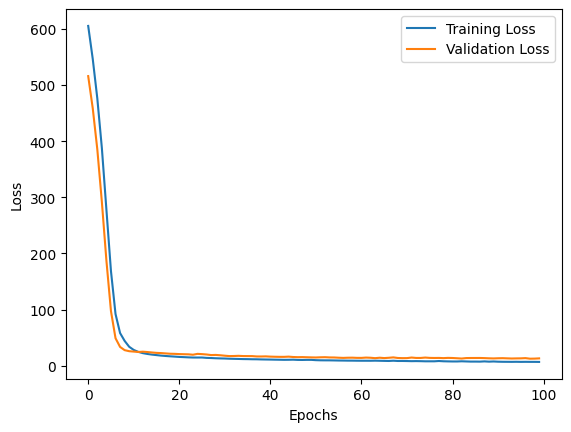

4/4 [==============================] - 0s 4ms/step
Mean Squared Error na zbiorze testowym: 12.350142559844398


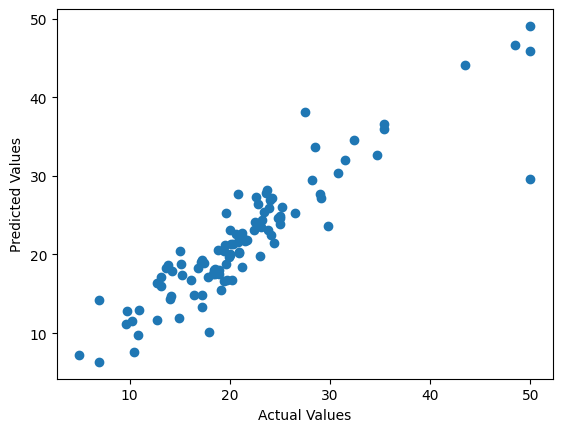

In [ ]:
#KERAS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv('boston_housing.csv')

# Przygotowanie danych
X = data.drop('medv', axis=1)
y = data['medv']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Budowa modelu
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Kompilacja modelu
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Trenowanie modelu
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Wykresy na podstawie historii trenowania
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predykcje na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Obliczenie metryk
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error na zbiorze testowym: {mse}')

# Sprawdzenie, czy wyniki nie są zbyt odległe od rzeczywistych wartości
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
